# Spotify Genre Classification

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

## Introduction

In this notebook we are going to classify music genres from a Spotify dataset.

## Load Data

In [2]:
df = pd.read_csv('genres_v2.csv')
df.head()

C:\Users\Anthony\AppData\Local\Temp\ipykernel_3924\3376641696.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('genres_v2.csv')


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


## Exploratory Data Analysis (EDA)

Let's explore the data starting with the shape of the data.

In [3]:
df.shape

(42305, 22)

Let's see the type of data we are working with.

In [4]:
df.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms           int64
time_signature        int64
genre                object
song_name            object
Unnamed: 0          float64
title                object
dtype: object

Since we have a mix of data types that would make our model complex, let's just use numeric data types. So let us drop some columns that are useless for us.

In [5]:
useless_columns = ['type','id','uri','track_href', 'analysis_url', 'time_signature', 'song_name','Unnamed: 0', 'title']
df = df.drop(columns=useless_columns)

In [6]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,Dark Trap
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,Dark Trap
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,Dark Trap
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,Dark Trap
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,Dark Trap


This data looks like it needs to be normalized.

In [7]:
df.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
genre                object
dtype: object

In [8]:
df.shape

(42305, 13)

Let's check if we have any null elements in our features.

In [9]:
df.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
genre               0
dtype: int64

Now, let us check what are target labels are.

In [10]:
for genre in df['genre'].unique():
    print(genre)

Dark Trap
Underground Rap
Trap Metal
Emo
Rap
RnB
Pop
Hiphop
techhouse
techno
trance
psytrance
trap
dnb
hardstyle


So, I notice that some of these genres are really similar to eachother. For example, Rap and Hiphop are the same genre (note: rap is hip-hop). Trap is a form of Hip-Hop music. And, techhouse and techno are pretty much the same. With the features we are using, it is going to be difficult to predict genres. 

Let's make things simpler and just use parent genres. From the genres that are given I can identify four different parent genres. We will predict these parent genres: Hiphop, Rock, Electric Dance Music (EDM), and Pop.

Let's map the given genres to their parent genres.

In [11]:
genre_map = {'Dark Trap': 'Hiphop', 'Underground Rap': 'Hiphop', 'Trap Metal': 'Hiphop', 'Emo': 'Rock',
             'Rap': 'Hiphop', 'RnB': 'Pop', 'Pop': 'Pop', 'Hiphop': 'Hiphop', 'techhouse': 'EDM', 'techno': 'EDM',
             'trance': 'EDM', 'psytrance': 'EDM', 'trap': 'Hiphop', 'dnb': 'EDM', 'hardstyle': 'EDM'}

df['genre'] = df['genre'].map(genre_map)

In [12]:
for genre in df['genre'].unique():
    print(genre)

Hiphop
Rock
Pop
EDM


### Integer Encoding

To make our model training simpler, and to avoid any training issues, let's integer encode the genre's.

In [13]:
display(df.dtypes)

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
genre                object
dtype: object

In [14]:
df = df.astype({'genre': 'category'})
display(df.dtypes)

danceability         float64
energy               float64
key                    int64
loudness             float64
mode                   int64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
duration_ms            int64
genre               category
dtype: object

In [15]:
df['genre_codes'] = df['genre'].cat.codes
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre,genre_codes
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,Hiphop,1
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,Hiphop,1
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,Hiphop,1
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,Hiphop,1
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,Hiphop,1


In [16]:
X, y = df.drop(columns=['genre', 'genre_codes']), df['genre_codes']

Let's continue with normal EDA.

In [17]:
X.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000


[Text(0, 0, 'EDM'),
 Text(1, 0, 'Hiphop'),
 Text(2, 0, 'Pop'),
 Text(3, 0, 'Rock')]

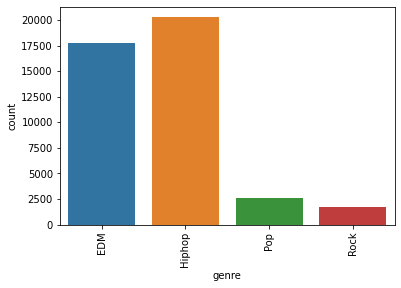

In [18]:
countplot = sns.countplot(x=df["genre"])
countplot.set_xticklabels(countplot.get_xticklabels(),rotation=90)

Their are may EDM and HipHop training examples and not many Pop or Rock examples.

Let us now look at any visual correlations.

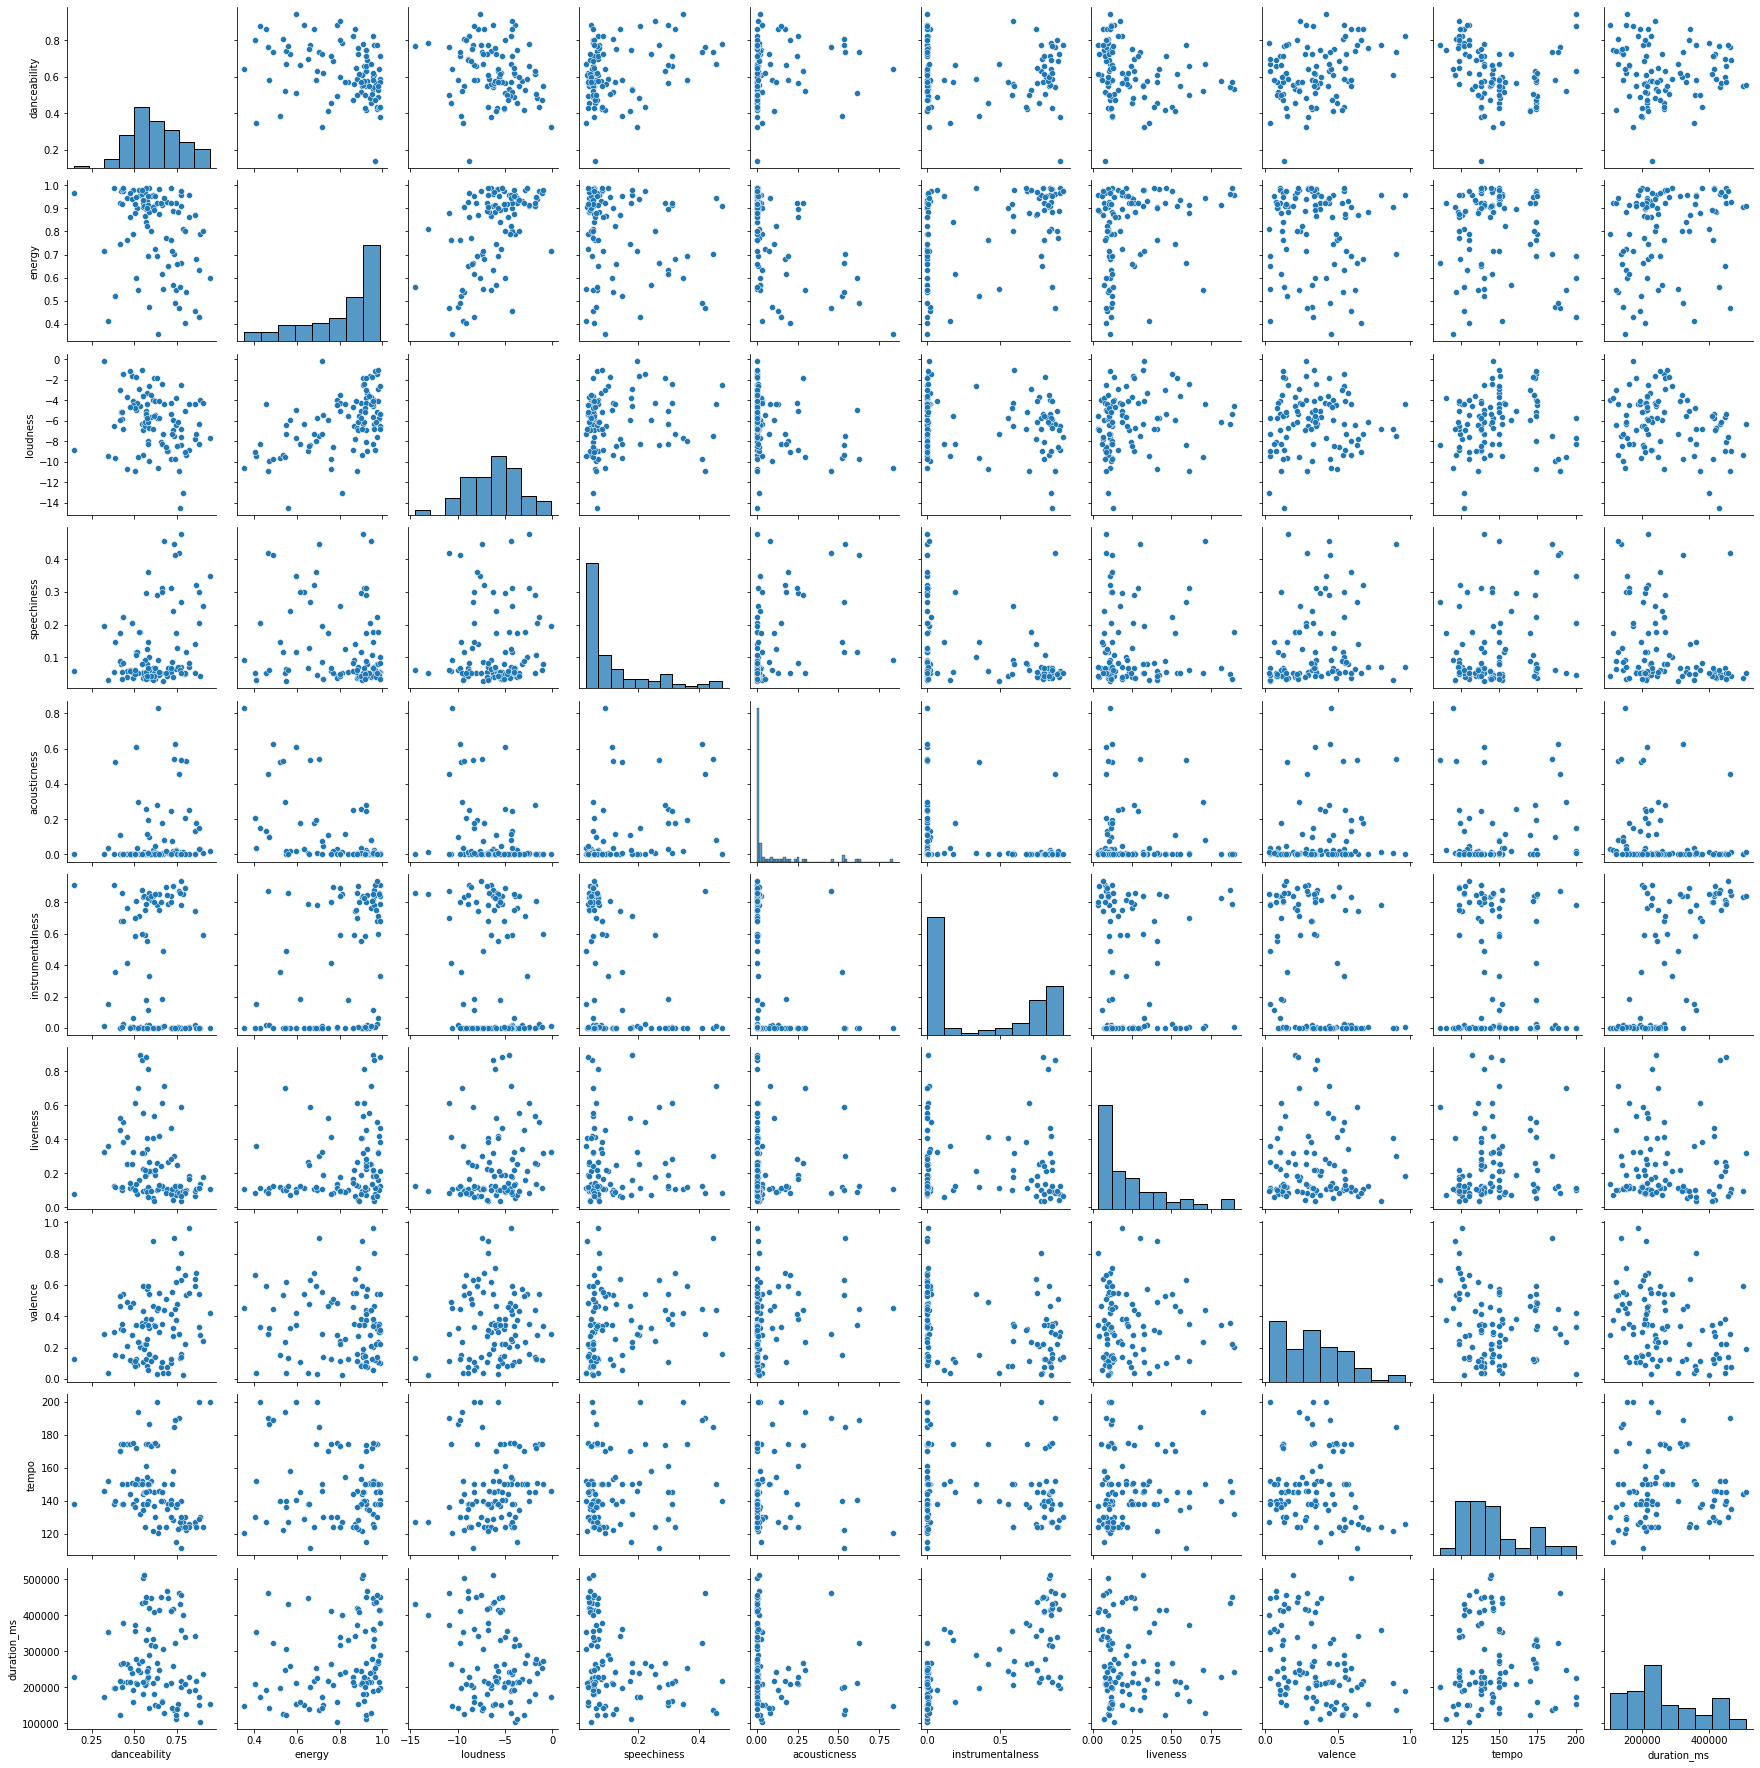

In [19]:
X_sample = X.sample(n=100).drop(['key', 'mode'], axis=1)
sns.pairplot(X_sample)

Some correlations have clusters. Let's look at the log of correlations to make sure if correlations exist or not.

C:\Users\Anthony\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
C:\Users\Anthony\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


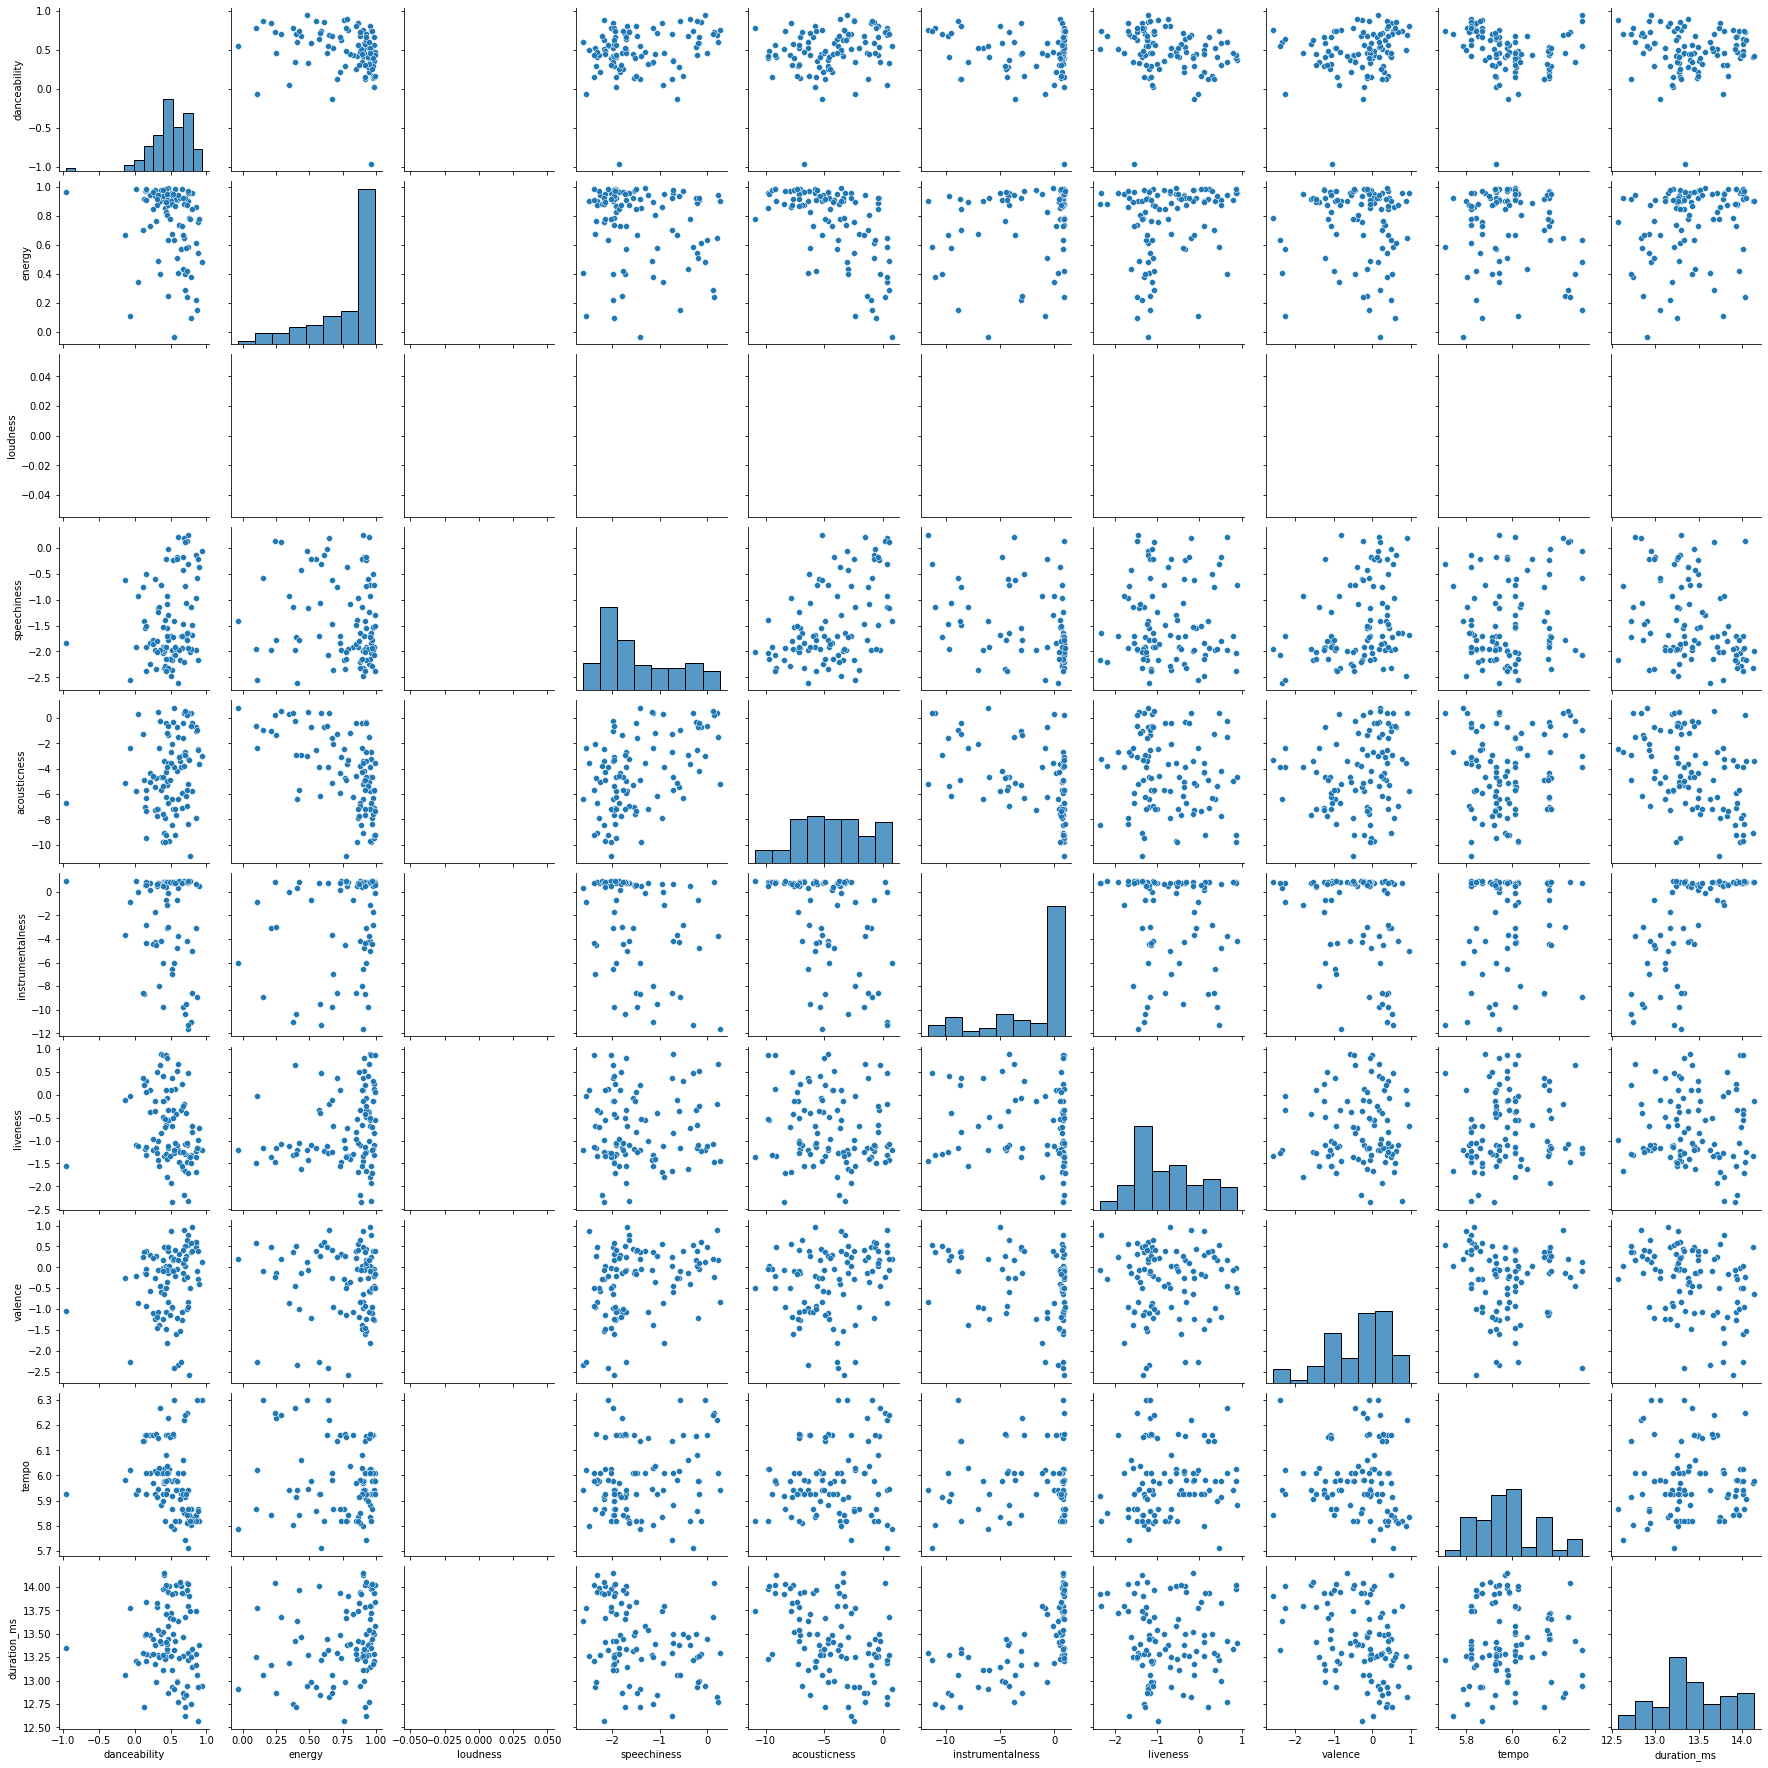

In [20]:
sns.pairplot(np.log(X_sample)+1)

A little positive correlation exist between energy and duration in ms. Let's now look at actual values.

In [21]:
X_sample.corr(method='pearson')

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
danceability,1.000000,-0.330695,-0.229995,0.295442,0.158019,-0.100852,-0.250052,0.305037,-0.231869,-0.038425
energy,-0.330695,1.000000,0.527054,-0.209258,-0.569372,0.332707,0.241370,-0.090922,-0.140770,0.248708
loudness,-0.229995,0.527054,1.000000,0.062381,-0.318798,-0.203565,0.150718,0.035675,0.105516,-0.268271
speechiness,0.295442,-0.209258,0.062381,1.000000,0.418474,-0.403198,0.028924,0.235676,0.255037,-0.278046
acousticness,0.158019,-0.569372,-0.318798,0.418474,1.000000,-0.336626,-0.073746,0.248821,0.080820,-0.224675
instrumentalness,-0.100852,0.332707,-0.203565,-0.403198,-0.336626,1.000000,-0.066767,-0.345099,-0.106791,0.725983
liveness,-0.250052,0.241370,0.150718,0.028924,-0.073746,-0.066767,1.000000,-0.006428,0.028694,0.022072
valence,0.305037,-0.090922,0.035675,0.235676,0.248821,-0.345099,-0.006428,1.000000,-0.103149,-0.356509
tempo,-0.231869,-0.140770,0.105516,0.255037,0.080820,-0.106791,0.028694,-0.103149,1.000000,-0.012174
duration_ms,-0.038425,0.248708,-0.268271,-0.278046,-0.224675,0.725983,0.022072,-0.356509,-0.012174,1.000000


<Axes: >

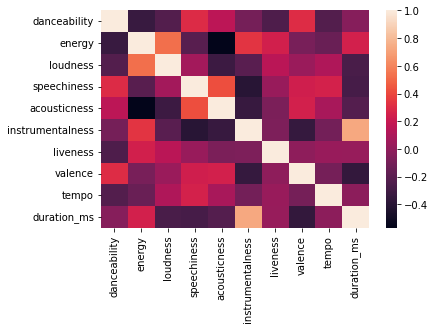

In [22]:
sns.heatmap(X_sample.corr())

## Model Training

We are going to train 3 different models with 3 different architectures. The architectures are: Stochastic Gradient Descent classifier, K-Nearest Neighbors, and a Neural Network.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [24]:
random_state = 7

### Train-Test Split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)

### Data Normalization

In [26]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

Let's use Grid Search to use the best parameters for each model.

In [27]:
def find_best_hyperparameters(clf, param_grid, X_train, y_train):
    """
    Input: The training X features and Y labels/values
    Output: The classifier with the best hyperparams, the predictions
    """    
    search = GridSearchCV(clf, param_grid)
    search.fit(X_train,y_train)
    return search

### SGD Classifier

In [28]:
clf = SGDClassifier()
param_grid = {"loss": ['log_loss', 'perceptron'],
              "penalty": ['l2'],
              "alpha": [0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3],
              "max_iter": [100000]}

In [29]:
sgd = find_best_hyperparameters(clf, param_grid, X_train_norm, y_train)

In [30]:
sgd

GridSearchCV(estimator=SGDClassifier(),
             param_grid={'alpha': [1e-05, 3e-05, 0.0001, 0.0003, 0.001, 0.003,
                                   0.01, 0.03, 0.1, 0.3],
                         'loss': ['log_loss', 'perceptron'],
                         'max_iter': [100000], 'penalty': ['l2']})

The parameters shows that it's a model with logistic regression architecture.

In [31]:
sgd.best_params_

{'alpha': 0.0003, 'loss': 'log_loss', 'max_iter': 100000, 'penalty': 'l2'}

In [32]:
print("Training score", sgd.score(X_train_norm,y_train))
print("Testing score:", sgd.score(X_test_norm,y_test))

Training score 0.7978756933938477
Testing score: 0.7960669376949986


### K-Nearest Neighbors

In [33]:
clf = KNeighborsClassifier()
param_grid = {"n_neighbors": [3, 5, 7],
              "p": [1, 2],
              "weights": ['uniform', 'distance']
             }

In [34]:
knn = find_best_hyperparameters(clf, param_grid, X_train_norm, y_train)

In [35]:
knn.best_params_

{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

The best model is a 7-Nearest Neighbor model.

In [36]:
print("Training score", knn.score(X_train_norm,y_train))
print("Testing score:", knn.score(X_test_norm,y_test))

Training score 0.9920259707513868
Testing score: 0.8619646402571618


### Neural Network

In [37]:
clf = MLPClassifier()
param_grid = {
    'hidden_layer_sizes': [(100,25), (100,50,100)],
    'activation': ['relu'],
    'solver': ['sgd'],
    'alpha': [0.0001, 0.001, 0.01]
}

In [38]:
nn = find_best_hyperparameters(clf, param_grid, X_train_norm, y_train)

C:\Users\Anthony\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Anthony\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Anthony\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Anthony\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and 

In [39]:
nn.best_params_

{'activation': 'relu',
 'alpha': 0.01,
 'hidden_layer_sizes': (100, 50, 100),
 'solver': 'sgd'}

In [40]:
print("Training score", nn.score(X_train_norm,y_train))
print("Testing score:", nn.score(X_test_norm,y_test))

Training score 0.8819024205748865
Testing score: 0.8682991396426207


The 7-Nearest Neighbor model and the nueral network model have similar test scores. Let's view their confusion matrix and classification report.

In [46]:
knn_preds = knn.predict(X_test_norm)
nn_preds = nn.predict(X_test_norm)

Let's start with the 7-Nearest Neighbor model.

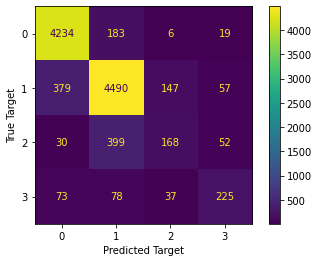

In [47]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, knn_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.xlabel('Predicted Target')
plt.ylabel('True Target')
plt.show()

In [48]:
print(classification_report(y_test,knn_preds))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      4442
           1       0.87      0.89      0.88      5073
           2       0.47      0.26      0.33       649
           3       0.64      0.54      0.59       413

    accuracy                           0.86     10577
   macro avg       0.72      0.66      0.68     10577
weighted avg       0.85      0.86      0.85     10577



Now let's look at the neural network.

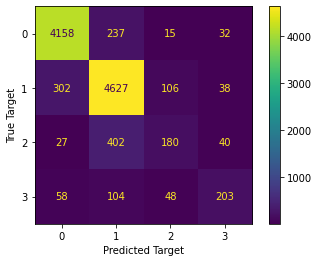

In [49]:
cm = confusion_matrix(y_test, nn_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.xlabel('Predicted Target')
plt.ylabel('True Target')
plt.show()

In [50]:
print(classification_report(y_test,nn_preds))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      4442
           1       0.86      0.91      0.89      5073
           2       0.52      0.28      0.36       649
           3       0.65      0.49      0.56       413

    accuracy                           0.87     10577
   macro avg       0.74      0.65      0.68     10577
weighted avg       0.85      0.87      0.86     10577



The Nueral Network model did slightly better then the 7-nearest neighbor model. 